In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data = pd.read_csv('train.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
refined_data = data.dropna(axis=0)

In [6]:
refined_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [7]:
refined_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [8]:
graduates = refined_data['Education'] == 'Graduate'
non_graduates = refined_data['Education'] == 'Not Graduate'

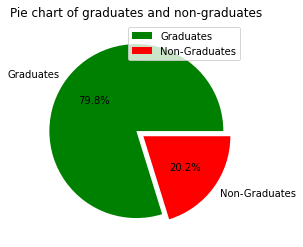

In [9]:
plt.pie([graduates.sum(), non_graduates.sum()], labels=['Graduates', 'Non-Graduates'], colors=['green','red'], autopct='%1.1f%%', explode=(0,0.1))
plt.title('Pie chart of graduates and non-graduates')
plt.legend()
plt.show()

In [10]:
male = refined_data['Gender'] == 'Male'
female = refined_data['Gender'] == 'Female'

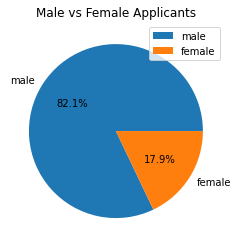

In [11]:
plt.pie([male.sum(), female.sum()], labels=['male', 'female'], autopct='%1.1f%%')
plt.title('Male vs Female Applicants')
plt.legend()
plt.show()

In [12]:
self_employed = refined_data['Self_Employed'] == 'Yes'
not_self_employed = refined_data['Self_Employed'] == 'No'

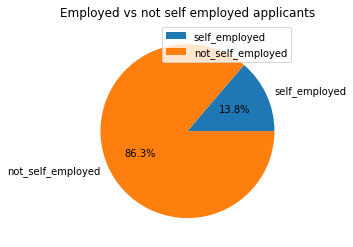

In [13]:
plt.pie([self_employed.sum(), not_self_employed.sum()], labels=['self_employed', 'not_self_employed'], autopct='%1.1f%%')
plt.title('Employed vs not self employed applicants')
plt.legend()
plt.show()

In [14]:
rural_applicants = refined_data['Property_Area'] == 'Rural'
urban_applicants = refined_data['Property_Area'] == 'Urban'

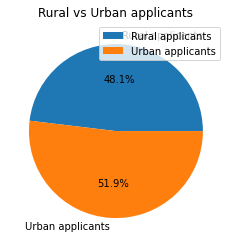

In [15]:
plt.pie([rural_applicants.sum(), urban_applicants.sum()], labels=['Rural applicants', 'Urban applicants'], autopct='%1.1f%%')
plt.title('Rural vs Urban applicants')
plt.legend()
plt.show()

<AxesSubplot:xlabel='Education'>

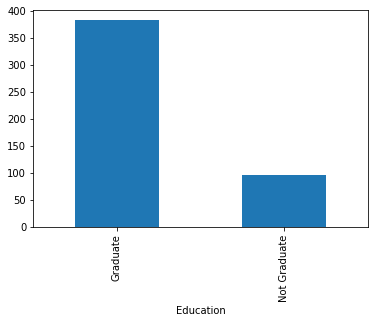

In [16]:
# applicant income vs loan amount
refined_data.groupby(['Education']).size().plot(kind = 'bar')

<AxesSubplot:xlabel='Property_Area'>

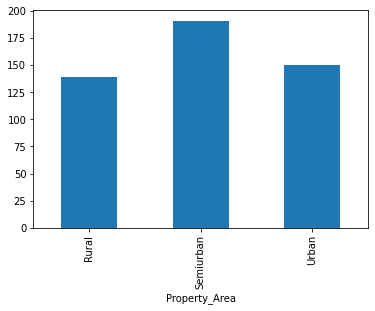

In [17]:
refined_data.groupby('Property_Area').size().plot(kind='bar')

<AxesSubplot:xlabel='Dependents'>

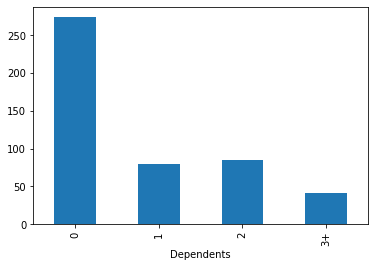

In [18]:
refined_data.groupby(['Dependents']).size().plot(kind='bar')

In [19]:
refined_data['ApplicantIncome'].max()

81000

In [20]:
refined_data['ApplicantIncome'].min()

150

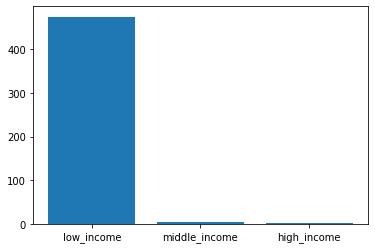

In [21]:
# low income => less than 20000
# middle income => less than 60000 more than 20000
# high income => more than 60000
low_income = refined_data.loc[refined_data['ApplicantIncome'] < 20000]
middle_income = refined_data.loc[(refined_data['ApplicantIncome'] > 20000) & (refined_data['ApplicantIncome'] < 60001)]
high_income =  refined_data.loc[refined_data['ApplicantIncome'] > 60000]
plt.bar(['low_income', 'middle_income', 'high_income'], [low_income.count()[0], middle_income.count()[0], high_income.count()[0]])
plt.show()

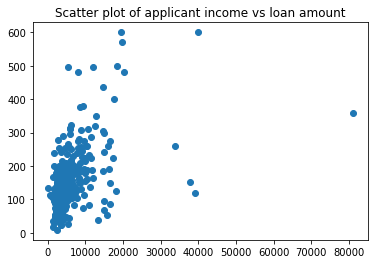

In [22]:
plt.scatter(refined_data['ApplicantIncome'], refined_data['LoanAmount'])
plt.title('Scatter plot of applicant income vs loan amount')
plt.show()

In [23]:
refined_data[['ApplicantIncome','LoanAmount']].corr()   # how correlated are applicant income and loan amount

,ApplicantIncome,LoanAmount
ApplicantIncome,1.00000,0.49531
LoanAmount,0.49531,1.00000


In [24]:
refined_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


<AxesSubplot:>

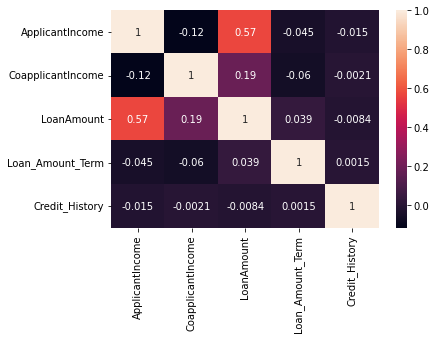

In [25]:
# sb.lmplot
sb.heatmap(data.corr(), annot=True)

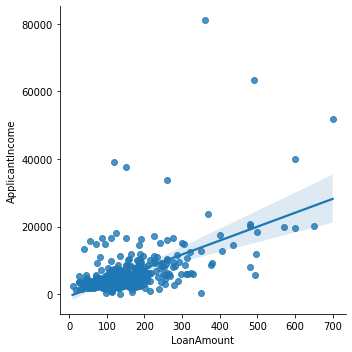

In [26]:
sb.lmplot(x = 'LoanAmount', y = 'ApplicantIncome', data = data)  # scatter plot

In [27]:
refined_data['Self_Employed'] = pd.get_dummies(refined_data['Self_Employed'])

<ipython-input-27-c82bff61f457>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  refined_data['Self_Employed'] = pd.get_dummies(refined_data['Self_Employed'])


In [28]:
refined_data['Loan_Status'] = pd.get_dummies(refined_data['Loan_Status'])

<ipython-input-28-dd4a05bc305b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  refined_data['Loan_Status'] = pd.get_dummies(refined_data['Loan_Status'])


In [29]:
refined_data['Education'] = pd.get_dummies(refined_data['Education'])

<ipython-input-29-70b5180922f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  refined_data['Education'] = pd.get_dummies(refined_data['Education'])


In [30]:
refined_data['Married'] = pd.get_dummies(refined_data['Married'])

<ipython-input-30-4773c9045ee4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  refined_data['Married'] = pd.get_dummies(refined_data['Married'])


In [31]:
refined_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,0,1,1,1,4583,1508.0,128.0,360.0,1.0,Rural,1
2,LP001005,Male,0,0,1,0,3000,0.0,66.0,360.0,1.0,Urban,0
3,LP001006,Male,0,0,0,1,2583,2358.0,120.0,360.0,1.0,Urban,0
4,LP001008,Male,1,0,1,1,6000,0.0,141.0,360.0,1.0,Urban,0
5,LP001011,Male,0,2,1,0,5417,4196.0,267.0,360.0,1.0,Urban,0


In [32]:
refined_data.corrwith(refined_data['Loan_Status'])

Married              0.112321
Education           -0.068437
Self_Employed       -0.034715
ApplicantIncome      0.043152
CoapplicantIncome    0.049020
LoanAmount           0.071753
Loan_Amount_Term     0.007798
Credit_History      -0.529390
Loan_Status          1.000000
dtype: float64

## MODEL IMPLEMENTATION

In [33]:
X = refined_data[['Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'Credit_History', 'LoanAmount']]
y = refined_data['Loan_Status']

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [35]:
from sklearn import svm
svc = svm.SVC()
svc.fit(X_train, y_train)
svc_ypred = svc.predict(X_test)

from sklearn.metrics import accuracy_score
print(f'Accuracy Score of SVM is: {accuracy_score(y_test, svc_ypred)}')

Accuracy Score of SVM is: 0.7083333333333334


In [36]:
test_data = pd.read_csv('test.csv')

In [37]:
test_data = test_data.dropna(axis='rows')

In [38]:
test_data['Self_Employed'] = pd.get_dummies(test_data['Self_Employed'])

In [39]:
test_data['Education'] = pd.get_dummies(test_data['Education'])

In [40]:
test_data['Married'] = pd.get_dummies(test_data['Married'])

In [41]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,0,0,1,1,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,0,1,1,1,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,0,2,1,1,5000,1800,208.0,360.0,1.0,Urban
4,LP001051,Male,1,0,0,1,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,0,0,0,0,2165,3422,152.0,360.0,1.0,Urban


In [42]:
X2_train = test_data[['Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'Credit_History', 'LoanAmount']]

In [43]:
test_ypred = svc.predict(X2_train)
test_data['Loan_Status'] = pd.Series(test_ypred) 

In [44]:
test_ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=uint8)

In [49]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
rclassifier_ypred = classifier.predict(X_test)

print(f'Accuracy of random forest classifier: {accuracy_score(y_test, rclassifier_ypred)}')

Accuracy of random forest classifier: 0.8125


In [51]:
classifier.predict(X2_train)

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=uint8)

In [59]:
from sklearn.neighbors import KNeighborsClassifier
kclassifier = KNeighborsClassifier()
kclassifier.fit(X_train, y_train)
kclassifier_ypred = kclassifier.predict(X_test)

print(f'Accuracy score of K Nearest Classifier: {accuracy_score(y_test, kclassifier_ypred)}')

Accuracy score of K Nearest Classifier: 0.6354166666666666


In [69]:
kclassifier.predict(X2_train)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0], dtype=uint8)

In [65]:
from sklearn.tree import DecisionTreeClassifier
dtclassifier = DecisionTreeClassifier()
dtclassifier.fit(X_train, y_train)
dt_ypred = dtclassifier.predict(X_test)

print(f'Accuracy score of Decision Tree Classifier: {accuracy_score(y_test, dt_ypred)}')

Accuracy score of Decision Tree Classifier: 0.75


In [68]:
dtclassifier.predict(X2_train)

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0], dtype=uint8)